In [1]:
import optuna
import sys

sys.path.append('../../')
from modules.plots import pareto_front

In [2]:
configs = [
    ('Net1_CSNN-Base-E5-B128-S20'),
    ('Net1_CSNN-Base-E5-B512-S20'),  
    ('Net1_CSNN-Base-E5-B1024-S20'),
    ('Net1_CSNN-Base-E10-B128-S20'), 
    ('Net1_CSNN-Base-E10-B512-S20'),
    ('Net1_CSNN-Base-E10-B1024-S20'),
    ('Net1_CSNN-Base-E5-B1024-S50'), 
    ('Net1_CSNN-Base-E5-B1024-S10'),

    ('Net2_CSNN-Base-E5-B128-S20'),
    ('Net2_CSNN-Base-E5-B512-S20'),
    ('Net2_CSNN-Base-E5-B1024-S20'),
    ('Net2_CSNN-Base-E10-B128-S20'),
    ('Net2_CSNN-Base-E10-B512-S20'),
    ('Net2_CSNN-Base-E10-B1024-S20'),
    ('Net2_CSNN-Base-E5-B1024-S50'), 
    ('Net2_CSNN-Base-E5-B1024-S10'),

    ('Net3_CSNN-Base-E5-B128-S20'),
    ('Net3_CSNN-Base-E5-B512-S20'),
    ('Net3_CSNN-Base-E5-B1024-S20'),
    ('Net3_CSNN-Base-E10-B128-S20'),
    ('Net3_CSNN-Base-E10-B512-S20'),
    ('Net3_CSNN-Base-E10-B1024-S20'),
    ('Net3_CSNN-Base-E5-B1024-S50'), 
    ('Net3_CSNN-Base-E5-B1024-S10'),
]

/Users/dylanperdigao/Documents/Github/Bayesian-Optimization-1D-CSNN/src/modules/plots/pareto_front.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(figsize=(10, 5))


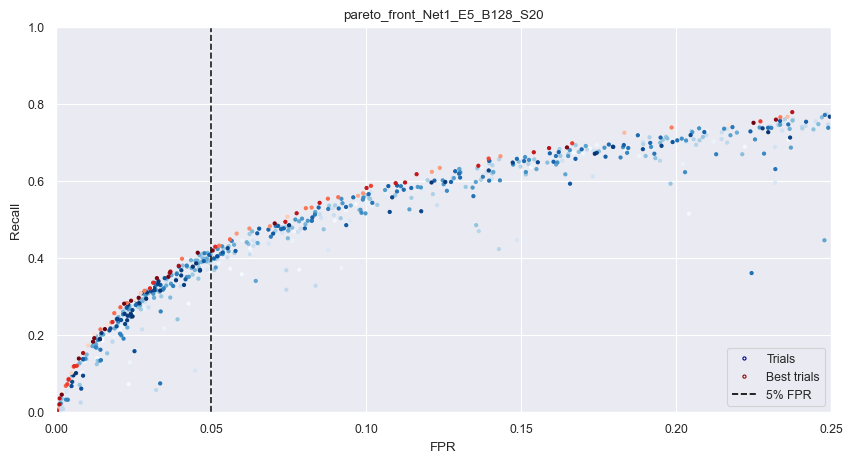

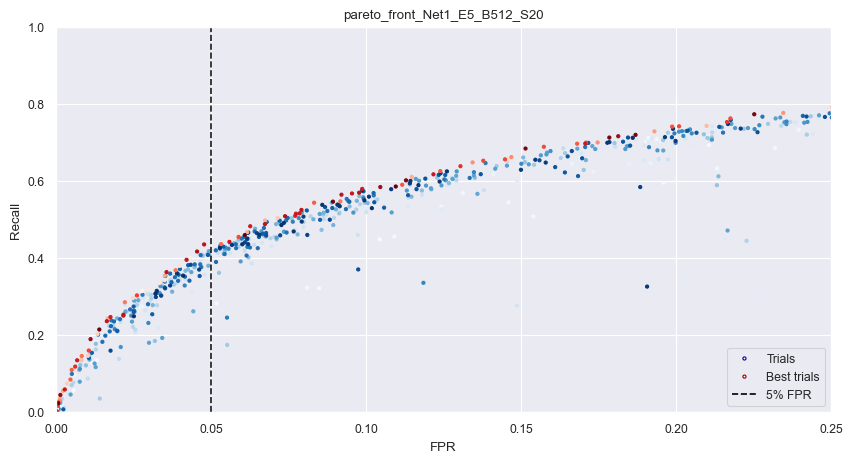

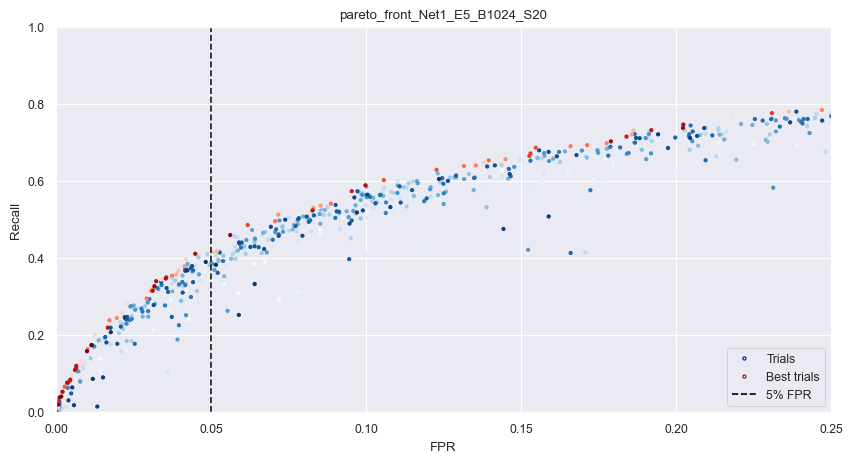

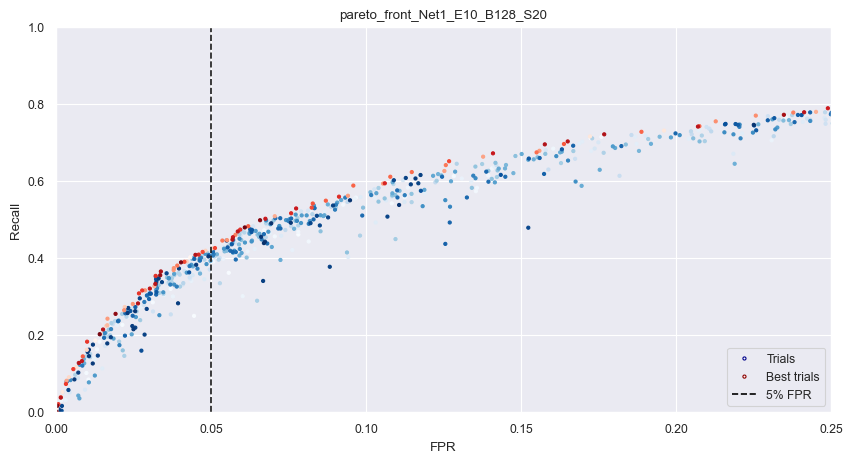

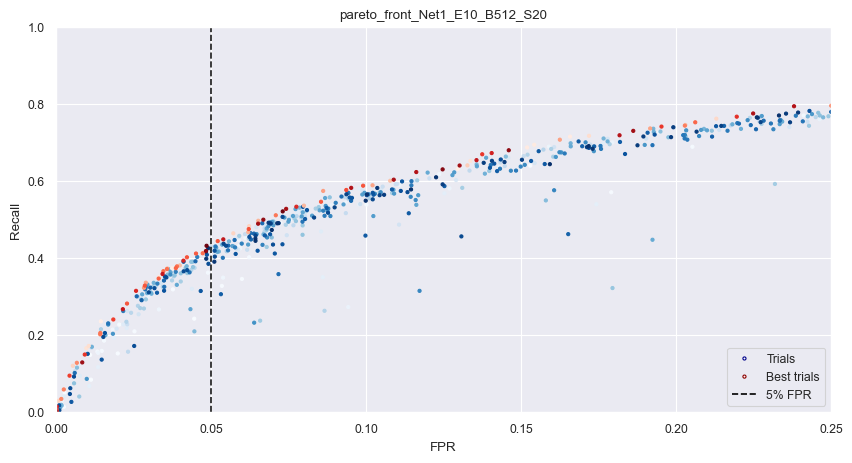

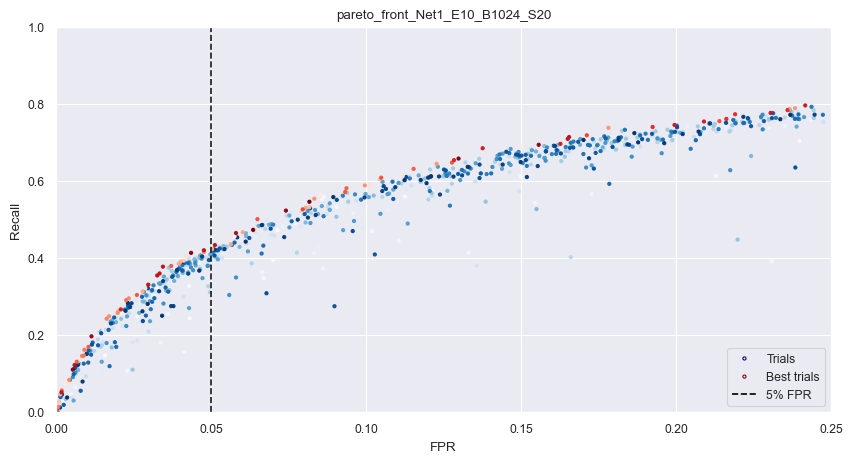

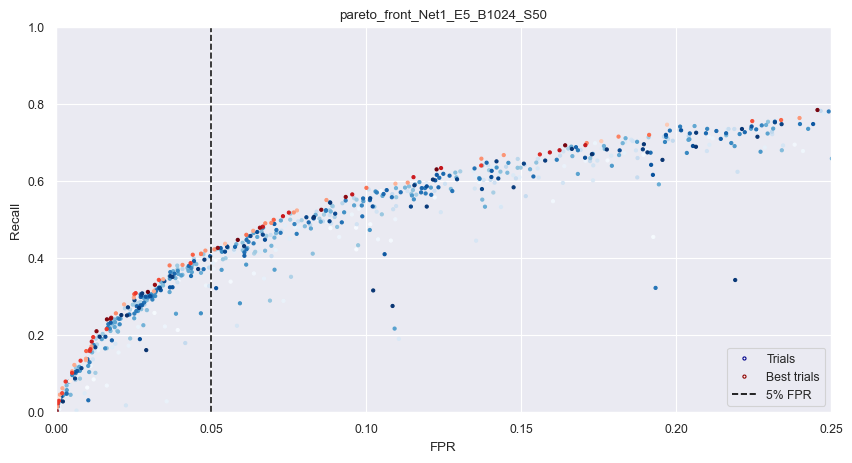

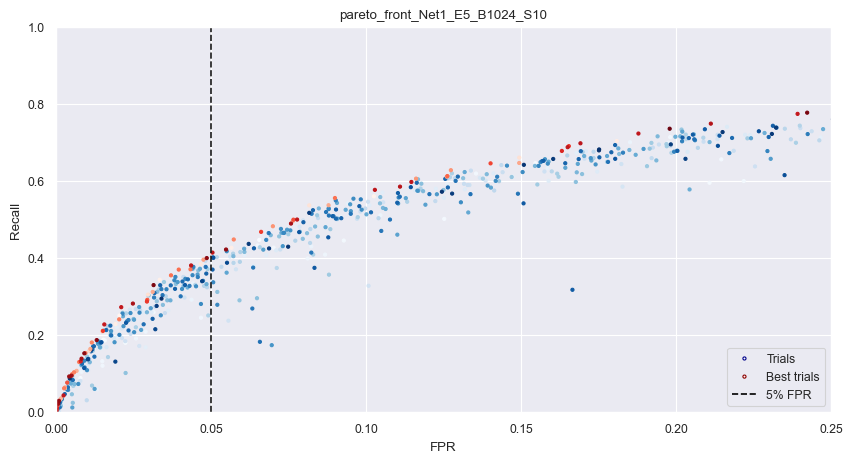

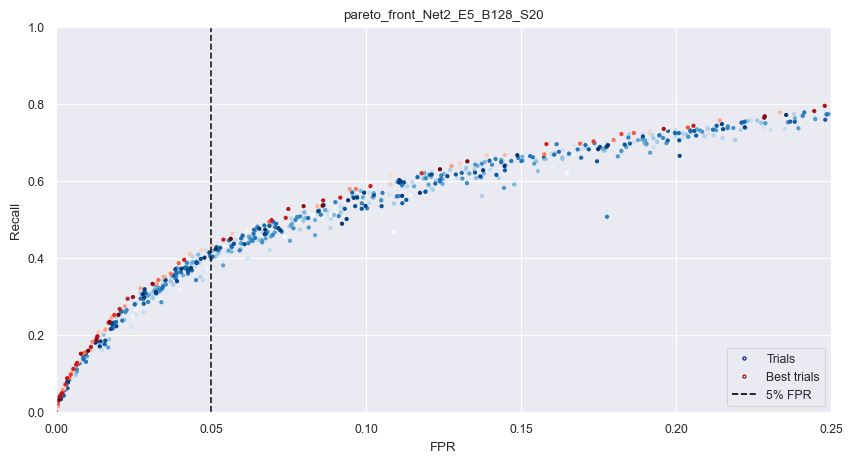

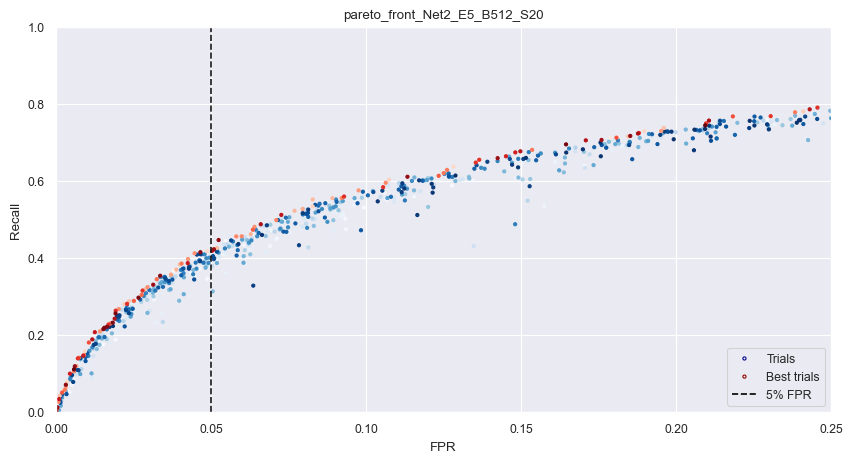

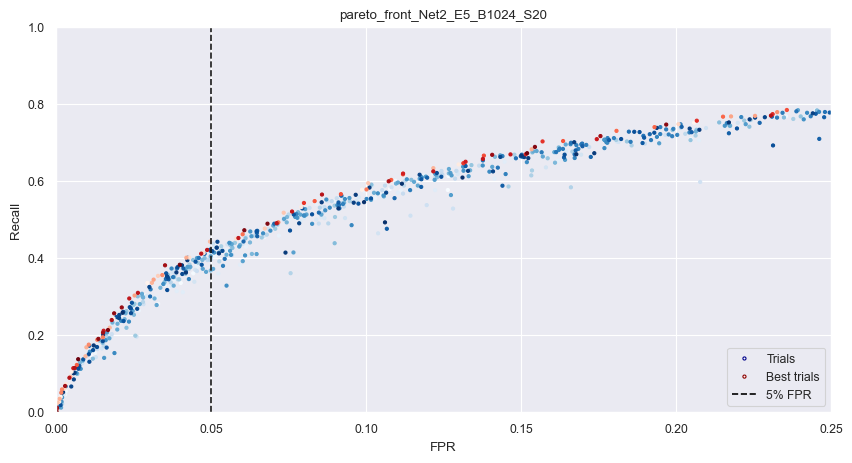

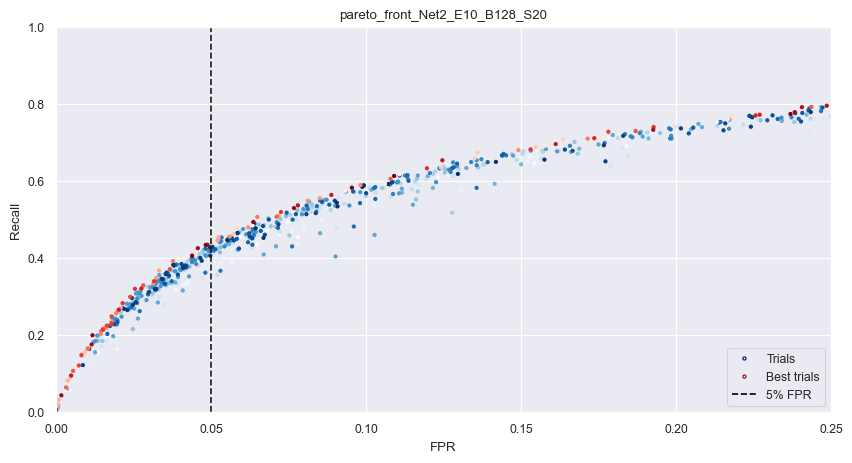

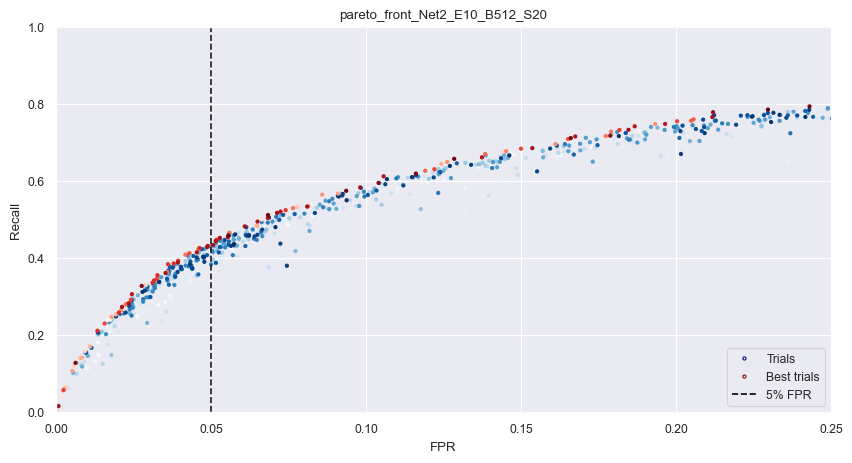

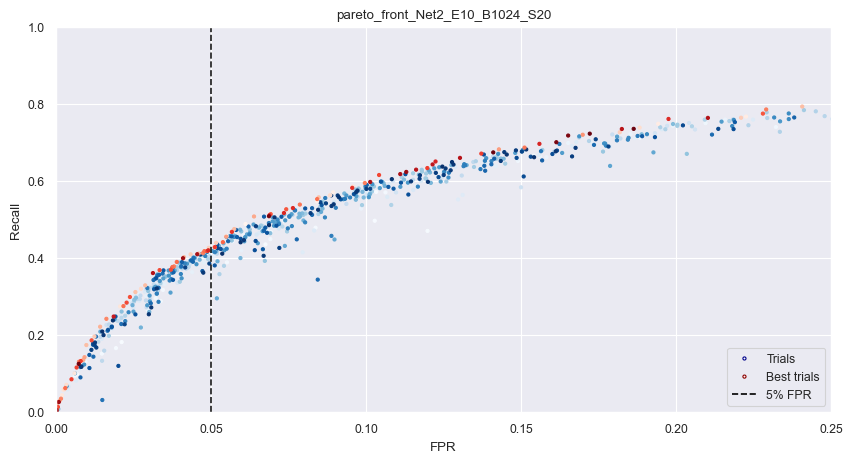

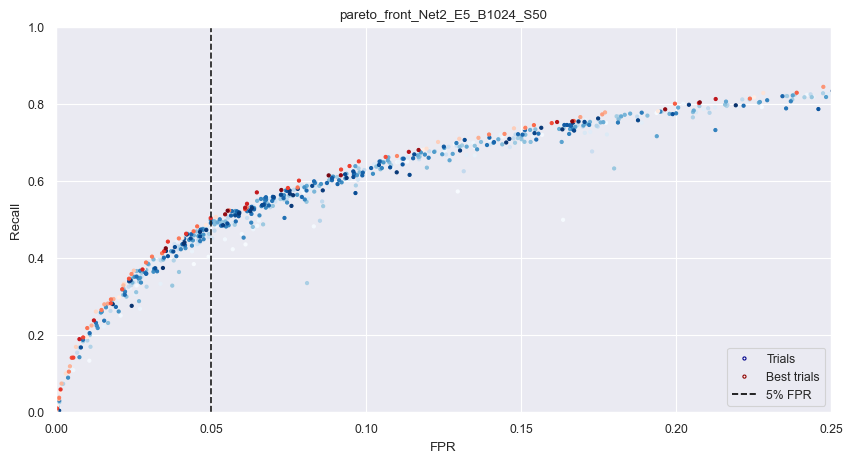

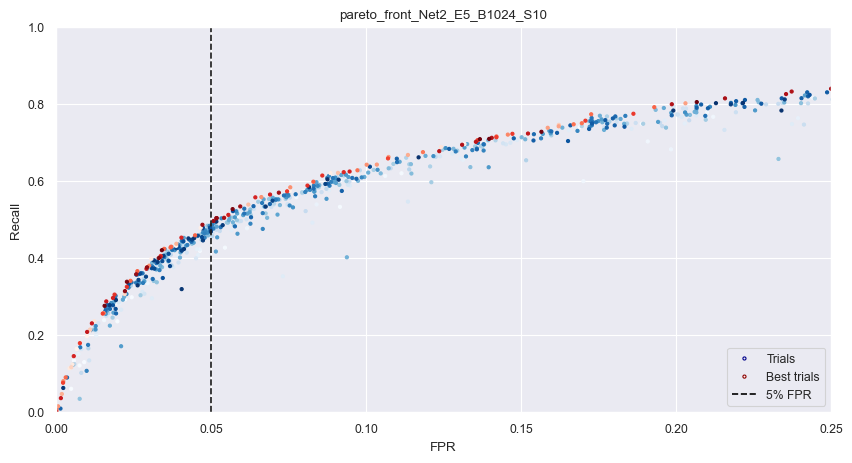

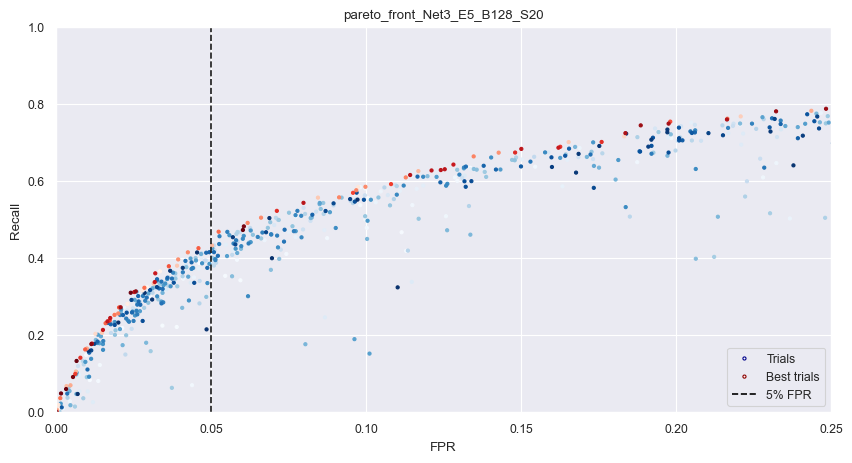

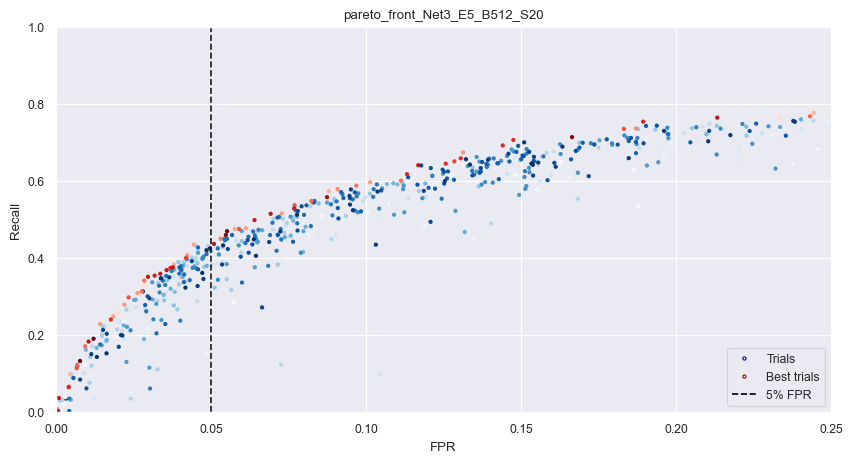

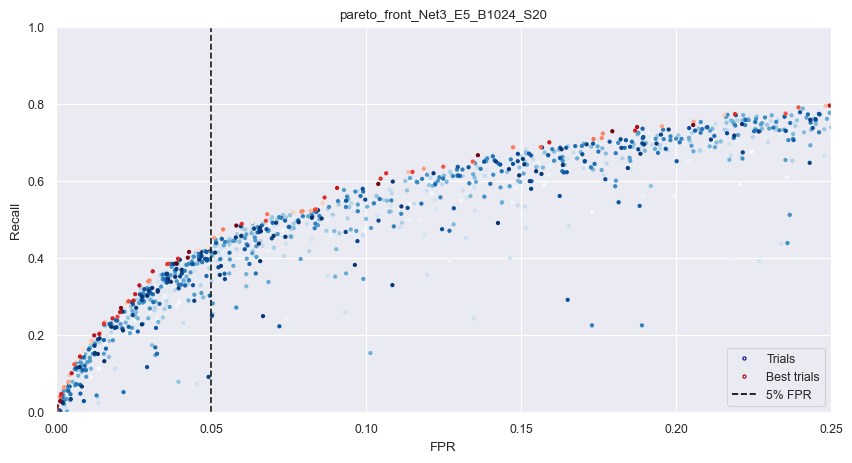

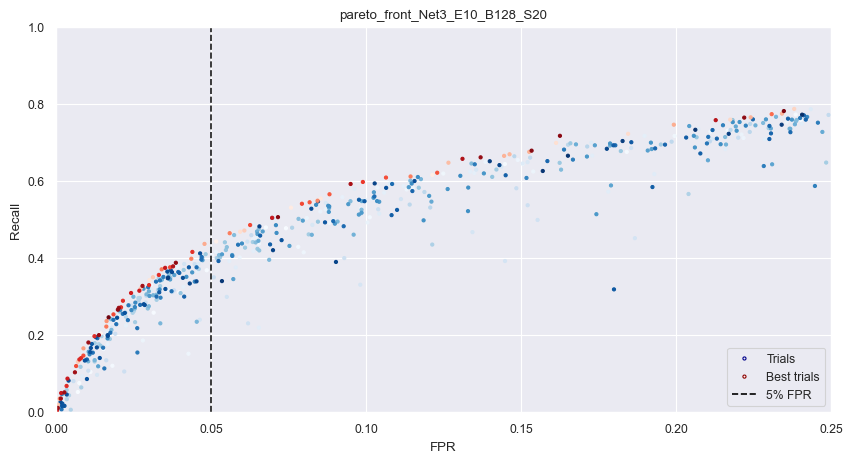

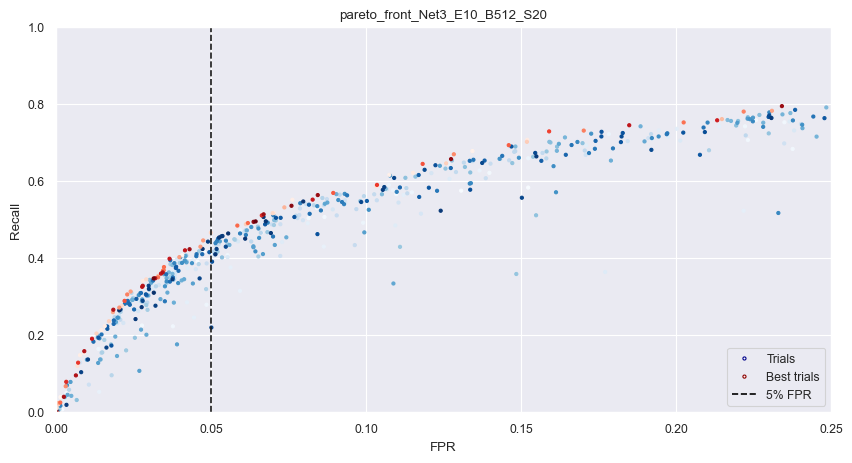

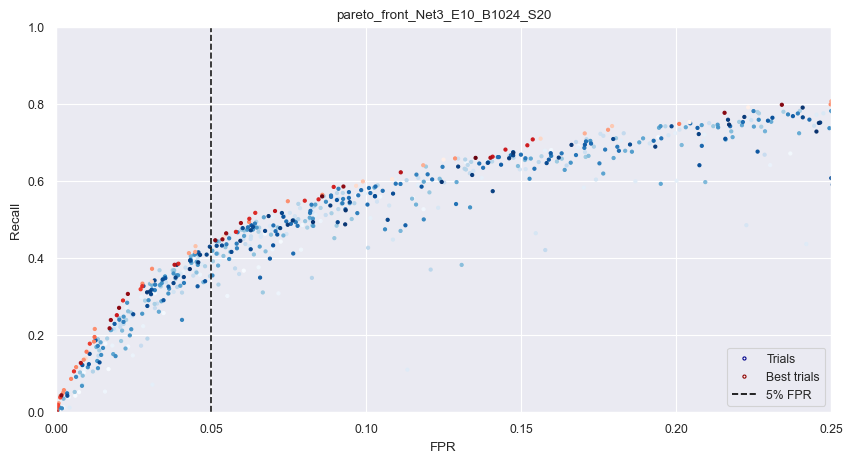

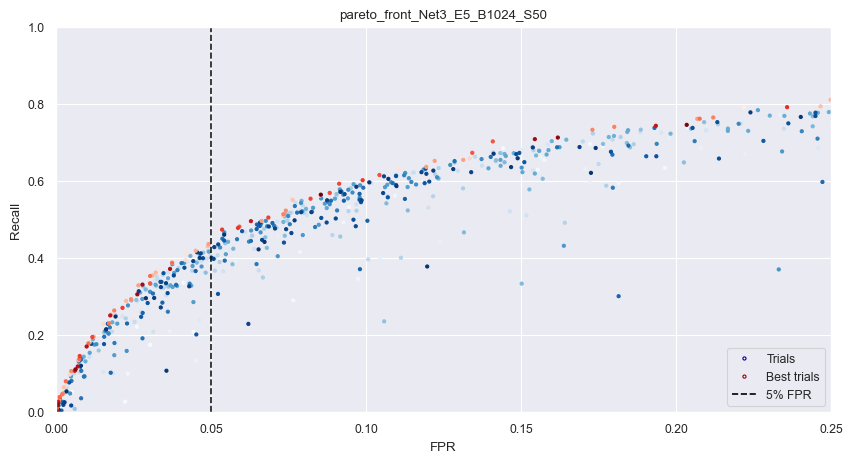

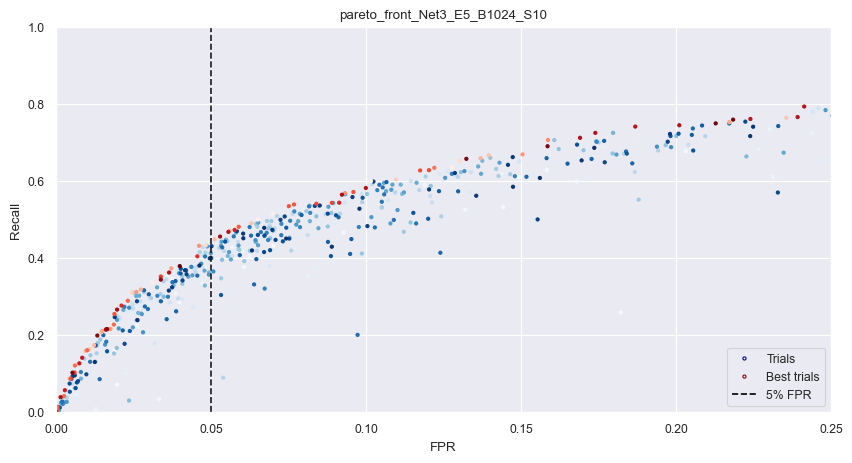

In [3]:
for config in configs:
    try:
        study = optuna.load_study(study_name=config, storage='sqlite:///../epia2024.db')
        net = f"Net{config.split('Net')[1].split('_')[0]}"
        epochs = int(config.split('E')[1].split('-')[0])
        batch_size = int(config.split('B')[2].split('-')[0])
        steps = int(config.split('S')[2].split('-')[0])
        filename = f'pareto_front_{net}_E{epochs}_B{batch_size}_S{steps}.png'
        pareto_front(study, filename=filename, path="./pareto_front", title=filename.split(".")[0], loc='lower right', text_scale=1)
    except Exception as e:
        print(f'Error in {config}: {e}')
        continue